In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib qt

In [6]:
def contrast_strech_gray(imgs,r1,r2,s1,s2):
    alpha = 0 if r1==0 else s1/r1
    beta = 0 if (r2-r1)==0 else (s2-s1)/(r2-r1)
    gamma = 0 if (255-r2)==0 else (255-s2)/(255-r2)
    
    res = np.array(imgs, copy=True, dtype='float')
#     for k,img in enumerate(imgs):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] < r1:
                res[i][j] = alpha*img[i][j]
            elif img[i][j] < r2:
                res[i][j] = beta*(img[i][j] - r1) + s1
            else:
                res[i][j] = gamma*(img[i][j] - r2) + s2
    return res

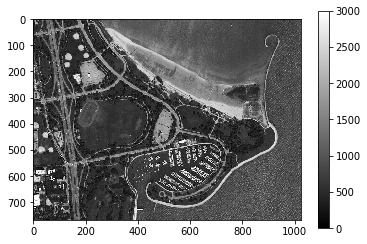

In [7]:
path = "images/sat_image.jpg"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
plt.imshow(contrast_strech_gray(img,0,255,0,3000),cmap="gray")
plt.colorbar()
plt.show()

In [3]:
path = "images/sat_image.jpg"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
# img = np.random.randint(50,200,(10,10))


# s1,s2 = 0, 255
# r1,r2 = np.min(img),np.max(img)
#
# img = s1 + ((s2-s1)/(r2-r1))*(img-r1)
# print(np.min(img),np.max(img))


r1, r2, = 130, 200
s1, s2 = 200, 250

plt.figure(1,figsize=(5,5))
plt.grid(True)
plt.plot([0,r1,r2,255],[0,s1,s2,255])

plt.figure(2,figsize=(15,10))
plt.subplot(121)
plt.title("original")
plt.imshow(img,cmap="gray")

alpha = s1/r1
beta = (s2-s1)/(r2-r1)
gamma = (255-s2)/(255-r2)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] < r1:
            img[i][j] = alpha*img[i][j]
        elif img[i][j] < r2:
            img[i][j] = beta*(img[i][j] - r1) + s1
        else:
            img[i][j] = gamma*(img[i][j] - r2) + s2


plt.subplot(122)
plt.title("modified")
plt.imshow(img,cmap="gray")

plt.show()